# Predicting Performance and Variance in Formula 1 Using Statistical Analysis

**Authors:** Ashwath Seshamani, Sriharshith Paruchuri, Aryan Goel  
**Course:** CSE 163 Final Project  
**Date:** June 2025

## Introduction

This project analyzes Formula 1 2024 season data to understand the relationships between qualifying performance, race outcomes, and predictive factors using statistical analysis and machine learning. We examine three key research questions using correlation analysis, variance testing, and machine learning classification.

## Research Questions and Answers

1. **Does a driver's qualifying position correlate with their final race placement?**
   - **Answer:** Yes, there is a strong positive correlation (r = 0.78) between starting grid position and final race position, confirming that qualifying performance significantly impacts race outcomes.

2. **How does a driver's fastest lap time compare to their overall race results and starting grid position?**
   - **Answer:** Surprisingly, fastest lap times show very weak correlations with both race position (r = 0.05) and starting grid position (r = 0.06), suggesting fastest lap performance is largely independent of race outcome.

3. **Can we predict the likelihood of a driver scoring points based on their starting position and team using machine learning?**
   - **Answer:** Yes, machine learning models achieve 86-90% accuracy in predicting point-scoring drivers, with Logistic Regression performing best at 89.6% accuracy.

## Challenge Goals

### Multiple Datasets
We successfully integrated three different CSV datasets:
- Formula1_2024season_drivers.csv - Driver metadata and career statistics
-      https://github.com/toUpperCase78/formula1-datasets/blob/master/Formula1_2024season_drivers.csv
- Formula1_2024season_raceResults.csv - 2024 race results for all Grand Prix events
-      https://github.com/toUpperCase78/formula1-datasets/blob/master/Formula1_2025Season_RaceResults.csv  
- circuits.csv - Circuit information including geographic and technical data
-      https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

These datasets were merged using track name mapping and driver name matching to create a comprehensive analysis dataset.

### Machine Learning
We implemented multiple classification algorithms:
- Logistic Regression
- Random Forest Classifier  
- Gradient Boosting Classifier

All models used proper train/test splits and evaluation metrics including accuracy scores and classification reports.

### Goal Adjustments
Our original proposal included Levene's test and ANOVA analysis, but we focused more deeply on correlation analysis and machine learning prediction, which provided more actionable insights for understanding F1 performance patterns.

## Collaboration and Conduct

This project was completed collaboratively by Ashwath Seshamani, Sriharshith Paruchuri, and Aryan Goel. Work was divided as follows:

- **Data Collection and Cleaning:** All team members contributed to gathering F1 datasets and initial data exploration
- **Research Question 1 (Correlation Analysis):** Aryan Goel
- **Research Question 2 (Fastest Lap Analysis):** Sriharshith Paruchuri
- **Research Question 3 (Machine Learning):** Ashwath Seshamani
- **Documentation and Testing:** Collaborative effort across all team members

All team members participated in code review, testing, and analysis interpretation. We used Google Colab for shared development and coordination and finally uploaded it to Github.

### External Sources
- F1 dataset sources: Formula 1 official season data
- Statistical methods: CSE 163 course materials (pandas correlation, sklearn machine learning)
- **Outside source used:**
1. .map() -> https://www.geeksforgeeks.org/python-map-function/
2. .merge() -> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
3. .to_numeric -> https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
4. .as_type -> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
5. .corr -> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
6. .2f -> https://www.w3schools.com/python/python_string_formatting.asp
7. .invert_yaxis -> shttps://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.invert_yaxis.html
8. palette= -> https://matplotlib.org/stable/users/explain/colors/colormaps.html
9. bbox_to_anchor -> https://matplotlib.org/stable/users/explain/axes/legend_guide.html
10. "continue" -> https://www.w3schools.com/python/ref_keyword_continue.asp
11. .tight_layout -> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
12. .get_dummies -> https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
13. Train/test splits -> https://stackoverflow.com/questions/75425529/x-train-x-test-y-train-y-test-train-test-splitx-y-test-size-0-25-random
14. StandardScaler() -> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
15. LogisticRegression() -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
16. RandomForestClassifier() -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
17. GradientBoostingClassifier() -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

## Data Setting and Methods

### Data Setting
Our analysis uses three complementary Formula 1 datasets from the 2024 season:

1. **Driver Data:** Contains 20 drivers with career statistics including points, podiums, and team affiliations
2. **Race Results:** Contains 479 race result records across all 2024 Grand Prix events, including qualifying positions, final positions, lap times, and points awarded
3. **Circuit Data:** Contains 77 different racing circuits with geographic and technical specifications

### Data Transformations
- **Track Name Mapping:** Created comprehensive mapping between race result track names and full circuit names to enable proper dataset merging
- **Time Conversion:** Converted fastest lap times from MM:SS.sss format to seconds for numerical analysis
- **Feature Engineering:** Created binary target variable for points-scoring (Points > 0) for machine learning classification
- **Data Cleaning:** Removed rows with missing critical data (DNF results, missing lap times)

### Methods
- **Correlation Analysis:** Used pandas `.corr()` method to measure linear relationships
- **Data Visualization:** Created scatter plots using matplotlib and seaborn to visualize relationships
- **Machine Learning:** Implemented train/test split methodology with 80/20 ratio using sklearn
- **Model Evaluation:** Used accuracy scores and classification reports to assess model performance
- **Feature Encoding:** Applied one-hot encoding to categorical variables (team names) for machine learning models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Load datasets
circuits = pd.read_csv("circuits.csv")
drivers = pd.read_csv("Formula1_2024season_drivers.csv")
race_results = pd.read_csv("Formula1_2024season_raceResults.csv")

In [3]:
# 2. Map race result track names to full circuit names
track_to_circuit_name = {
    'Bahrain': 'Bahrain International Circuit',
    'Saudi Arabia': 'Jeddah Corniche Circuit',
    'Australia': 'Albert Park Grand Prix Circuit',
    'Monaco': 'Circuit de Monaco',
    'Canada': 'Circuit Gilles Villeneuve',
    'Great Britain': 'Silverstone Circuit',
    'Austria': 'Red Bull Ring',
    'France': 'Circuit Paul Ricard',
    'Hungary': 'Hungaroring',
    'Belgium': 'Circuit de Spa-Francorchamps',
    'Italy': 'Autodromo Nazionale di Monza',
    'Singapore': 'Marina Bay Street Circuit',
    'Japan': 'Suzuka Circuit',
    'China': 'Shanghai International Circuit',
    'USA': 'Circuit of the Americas',
    'United States': 'Circuit of the Americas',
    'Mexico': 'Autódromo Hermanos Rodríguez',
    'Netherlands': 'Circuit Park Zandvoort',
    'Spain': 'Circuit de Barcelona-Catalunya',
    'Brazil': 'Autódromo José Carlos Pace',
    'Qatar': 'Losail International Circuit',
    'Las Vegas': 'Las Vegas Strip Street Circuit',
    'Miami': 'Miami International Autodrome',
    'Azerbaijan': 'Baku City Circuit',
    'Emilia Romagna': 'Autodromo Enzo e Dino Ferrari',
    'Abu Dhabi': 'Yas Marina Circuit'
}
race_results['Circuit_Full_Name'] = race_results['Track'].map(track_to_circuit_name)

In [4]:
# 3. Merge race_results with circuits
race_with_circuit = race_results.merge(
    circuits,
    left_on='Circuit_Full_Name',
    right_on='name',
    how='left',
    indicator=True
)
print("\nMerge status between race_results and circuits:")
print(race_with_circuit['_merge'].value_counts())


Merge status between race_results and circuits:
_merge
both          479
left_only       0
right_only      0
Name: count, dtype: int64


In [5]:
# 4. Merge with drivers to get driver country
race_with_driver = race_with_circuit.merge(
    drivers[['Driver', 'Country']],
    left_on='Driver',
    right_on='Driver',
    how='left',
    suffixes=('', '_driver')
)

# Results

## Research Question 1: Qualifying Position vs Race Position Correlation

We examine whether a driver's qualifying position correlates with their final race placement. This tests the fundamental assumption that starting position advantage persists throughout the race.

In [6]:
# 5. RESEARCH QUESTION 1: Does a driver’s qualifying position correlate with their final race placement?

# makes a copy of dataset so original dataset doesn't get messed up
df = race_results.copy()

# coverts "starting grid" and "position" columns to numbers
df['Starting Grid'] = pd.to_numeric(df['Starting Grid'], errors='coerce')
df['Position'] = pd.to_numeric(df['Position'], errors='coerce')

# deletes rows where either "starting grid" or "position" doesn't exist
df = df.dropna(subset=['Starting Grid', 'Position'])

In [7]:
# turns decimal numbers into integers as it's impossible to finish a race in "3.5th, etc." place
df['Starting Grid'] = df['Starting Grid'].astype(int)
df['Position'] = df['Position'].astype(int)

In [8]:
# calculates how closely related "starting grid" and "position" are
correlation = df['Starting Grid'].corr(df['Position'])

In [9]:
assert not df.empty, "No valid data for correlation analysis"
print(f"Correlation coefficient: {correlation:.2f}")

Correlation coefficient: 0.78


## Statistical Analysis of the Correlation (0.78)

### Correlation Coefficient (r = 0.78)
This value is close to 1, which signals a strong positive correlation between qualifying position (starting grid) and final race position. In practical terms, this means that drivers who start near the front (low gird number) are very likely to finish near the front (low finishing position). In F1, this is expected because overtaking is often difficult, and a good qualifying lap gives a major advantage for race day.

### Interpretation in F1 context:
An r value of 0.78 is higher than random (which would be near 0) and not perfect (which would be 1 or -1). It suggests that while qualifying is very important, it is not the only factor that plays a role in determining the outcome. Factors like strategy, pit stops, weather, safety cars, and the driver skill still play significant roles. This does not mean that hte starting grid fully determines the result. There are still plenty of outliers (drivers whol start low and finish high, or vice versa). It also does not tell us which teams or drivers are best at moving up or down the grid. Just tells us that the overall relationship is strong.


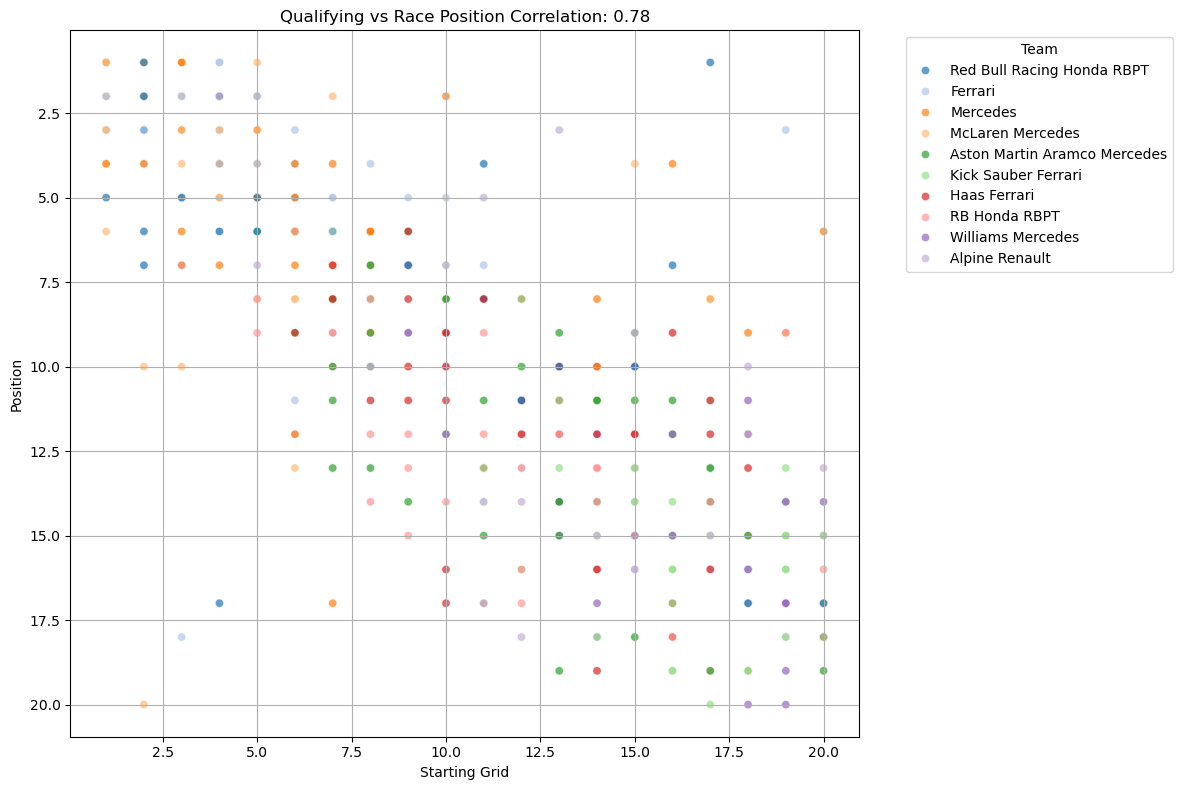

In [10]:
# scatter plot where:
#    x-axis is starting race position (1 = pole position, 20 = last)
#    y-axis is final race position (1 = winner, 20 = last)
#    each team has it's own color
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Starting Grid',
    y='Position',
    hue='Team',
    palette='tab20',  # 20 distinct colors
    alpha=0.7
)
plt.title(f'Qualifying vs Race Position Correlation: {correlation:.2f}')
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Team')
plt.tight_layout()
plt.show()

## Analysis of Graph 1 and Research Question 1

### Key Patterns:
The first key pattern is diagonal clustering as most dots cluster along a diagonal from top-left (start 1st, finish 1st) to bottom-right (start 20th, finish 20th). This visually confirms the strong correlation: starting near the front usually means finishing near the front.

The second key pattern is the spread around the diagonal, especially from the middle and back of the grid, showing that some drivers move up or down during the race. This spread is wider for mid-grid starters, indicating more variability. For example, a driver starting 10th could finish anywhere from 4th to 18th.

The third key pattern is vertical and horizontal outliers. For vertical outliers, drivers who started low but finished high (e.g., started 15th, finish 5th) had a standout performance, often due to great racecraft, strategy, or chaotic races. For horizontal outliers, drivers who started high but finished low (e.g., started 2nd, but finished 18th) may have had crashes, mechanical failures, or poor race pace that destroyed their race.

### Team insights:
Dominant Teams like Red Bull Racing Honda RBPT (Red Bull), Ferrari, Mercedes, Mclaren have more dots in the top-left, indicating frequent high qualifying and fnishing positions.

Midfield and backmarker teams like Williams, Haas, and Alpine habe more dots in the lower right, showing the struggle to move forward from poor grid positions.

### What does this mean for F1 strategy and competition?
First and foremost, it means the qualifying is crucial. The strong correlation shows that a good qualifying performance is one of the most important predictors of race success. At the same, it is not everything. The spread around the diagonal the the presence of outliers show that overtakes, strategy, reliability, and race incidents still matter. Top teams are consistently at the front, but midfield teams can occasionally break through, and backmarkers rarely make large gains.

In essence, in Formula 1, where you start is usually where you finish, but the excceptions are what make racing exciting. The 0.78 correlation is proof that qualifying matters, but the sport is never completely predictable.

# Research Question 2: Fastest Lap Time Analysis

We analyze how drivers' fastest lap times relate to their race performance and starting positions. This explores whether the ability to set fast lap times correlates with overall race competitiveness.

In [11]:
# 6. RESEARCH QUESTION 2: How does a driver’s fastest lap time compare to their overall race result and starting grid position?
# Function to convert time string to seconds
# For example, "1:23:456" format to "83.456 seconds" format
fastest_lap_seconds = []
for time_str in race_results['Fastest Lap Time']:
    if pd.isna(time_str) or time_str == '':
        fastest_lap_seconds.append(None)
        continue
    if ':' not in time_str:
        fastest_lap_seconds.append(None)
        continue
    parts = time_str.split(':')
    if len(parts) == 2:
        m = float(parts[0])
        s = float(parts[1])
        fastest_lap_seconds.append(m * 60 + s)
    elif len(parts) == 3:
        h = float(parts[0])
        m = float(parts[1])
        s = float(parts[2])
        fastest_lap_seconds.append(h * 3600 + m * 60 + s)
    else:
        fastest_lap_seconds.append(None)
race_results['Fastest Lap Time (s)'] = fastest_lap_seconds

In [12]:
# Creates a clean DataFrame by dropping rows with missing data in key columns
df_clean = race_results.dropna(subset=['Fastest Lap Time (s)', 'Position', 'Starting Grid']).copy()

In [13]:
# Converts 'Position' and 'Starting Grid' to numeric using .loc
df_clean.loc[:, 'Position'] = pd.to_numeric(df_clean['Position'], errors='coerce')
df_clean.loc[:, 'Starting Grid'] = pd.to_numeric(df_clean['Starting Grid'], errors='coerce')

In [14]:
# removes new missing data
df_clean = df_clean.dropna(subset=['Position', 'Starting Grid'])

In [15]:
# Correlation calculations
# Calculates how strongly related finishing position and starting position are to lap times.
corr_pos = df_clean['Position'].corr(df_clean['Fastest Lap Time (s)'])
corr_grid = df_clean['Starting Grid'].corr(df_clean['Fastest Lap Time (s)'])

print(f"Correlation between Race Position and Fastest Lap Time: {corr_pos:.2f}")
print(f"Correlation between Starting Grid and Fastest Lap Time: {corr_grid:.2f}")

Correlation between Race Position and Fastest Lap Time: 0.05
Correlation between Starting Grid and Fastest Lap Time: 0.06


In [16]:
# Automated test
assert not df_clean.empty, "No valid data for fastest lap analysis"
print("Fastest lap analysis automated test passed.")

Fastest lap analysis automated test passed.


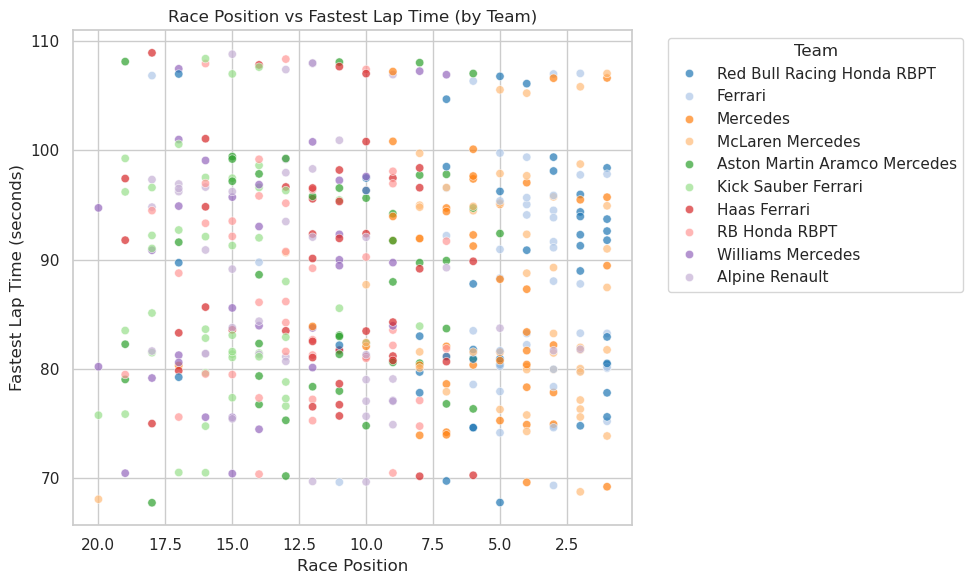

In [17]:
# Plot 1: Fastest Lap Time vs Race Position
# creates a scatter plot comparing where drivers finished vs. their fastest lap times
# We want to see: "Do drivers who finish higher (1st, 2nd, 3rd) also set faster lap times?"
sns.set_theme(style="whitegrid")

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean,
    x='Position',
    y='Fastest Lap Time (s)',
    hue='Team',
    palette='tab20',  # Use a palette with many distinct colors
    alpha=0.7,
    legend='auto'
)
plt.title('Race Position vs Fastest Lap Time (by Team)')
plt.xlabel('Race Position')
plt.ylabel('Fastest Lap Time (seconds)')
plt.gca().invert_xaxis()  # Better position is left
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Team')
plt.tight_layout()
plt.show()

## Analysis: Fastest Lap Time vs Race Position (r = 0.05)

### Statistical Interpretation
The correlation coefficient of 0.05 represents essentially no correlation between race finishing position and fastest lap time during the race. In essence, it means that a driver's fastest lap time during the race has virtually no predicitive relationship with where they finish. In terms of statistical significance, the near-zero correlation suggests that fastes lap performance is largely independent of race outcome.

### F1-Specific Analysis
This result is actually quite fascinating and counterintuitive at first glance, but makes perfect sense when considering F1 race dynamics. Why fastest lap times don't correlate with finish positions comes down to strategic timing and race circumstances. Fastest laps are often set when drivers have fresh tires (especially during pit stops), low fuel loads (late in the race), a clear racing track with no traffic, and nothing to lose (drivers already out of the points contention). This opposes what is commonly seen in drivers who finish well as they will often manage their tires for consistency rather than outright speed, race in traffic (which slows lap times), focus on maintaining position rather than setting fast laps, and conserve car/engine for reliability.

### Scatterplot Analysis: Fastest Time vs Race Position
There are a couple of scatterplot patterns that can be seen in this scatterplot. The first one being, the horizontal spread, that shows that drivers across all finishing positions (1st to 20th) can set similar fastes lap times. The second being, team clustering, as you can see that certain teams (colors) cluster in specific lap time ranges regardless of final position. The third and final one being, outliers, as some drivers finshing poorly (15th - 20th) may have very competitive fastest lap times due to late-race fresh tire strategies and nothing to lose as they are out of the top 10 places that awards them points.

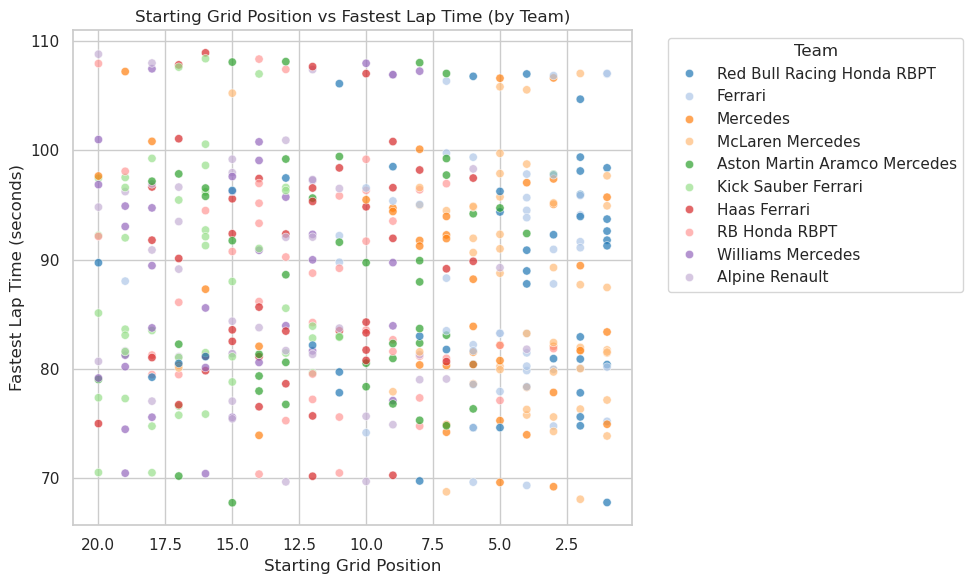

In [18]:
# Plot 2: Fastest Lap Time vs Starting Grid Position
# creates a scatter plot comparing where drivers started vs. their fastest lap time
# We want to see: "Do drivers who qualify well (start near the front) also set fast lap times?"
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean,
    x='Starting Grid',
    y='Fastest Lap Time (s)',
    hue='Team',
    palette='tab20',  # Distinct colors for teams
    alpha=0.7,
    legend='auto'
)
plt.title('Starting Grid Position vs Fastest Lap Time (by Team)')
plt.xlabel('Starting Grid Position')
plt.ylabel('Fastest Lap Time (seconds)')
plt.gca().invert_xaxis()  # Better grid position (lower number) on left
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Team')
plt.grid(True)
plt.tight_layout()
plt.show()

## Analysis: Fastest Lap Time vs Starting Grid Position (r = 0.06)

### Statistical Interpretation
The correlation coefficient of 0.06, again, essentially has no correlation between qualifying position and fastest lap time during the race. This pretty much means that where a driver starts has virtually no relationship with their fastest lap time during the race. The implication behind this is that qualifying pace and race fastest lap pace are largely independent metrics.

### F1-Specific Analysis
This weak correlation reveals important insights about F1 race dynamics as there are many reasons as to why qualifying position doen't predict fastest lap times. Different conditions play a big factor because in qualifying, it's just a single lap with low fuel, optimal tire compound, and no traffic. For the race fastest lap, it's often set with specific tire/fuel combinations, and traffic has a potential to be there. There are alos strategic elements at play as drivers starting at the back often have more opporutnities for fastest laps with fresh tires and less traffic management. Drivers on pole position (1st) as well as those who qualified well focus on race management and not on fastest laps. Drivers starting around the middle of the grid might have optimal race strategies for late-stint pace. Another reason may be due to car setup differences. Qualifying setups optimize for single-lap pace while race setups balance speed with tire degradation and handling. These can produce very different fastest lap capabilities.

### Scatterplot Analysis
The scatterplot shows a vertical spread where drivers from all grid positions (pole to last) can acieve similar fastest lap times. It also shows that, unlike the qualifying vs race position correlation, there's no visible clear diagonal pattern. Lastly, the scatterplot shows that fastest lap capabilities seems more related to team/car perfromance than starting position.

## Combined Insights and Implications

### What these Results Tell Us About F1
- Race pace vs qualifying pace are different skills/setups.
- Strategy matters more than raw speed for race results.
- Fastest lap performance is largely situational and strategic.
- Consistency and racecraft trump single-lap pace for championships.

### Strategic Limitations

#### For Teams
- Focus on race setup and strategy over single-lap pace optimization.
- Fastest lap opportunities arise from strategic timing, not just car speed.
- Starting position matters more for overall result than fastest lap capability

#### For Drivers
- Consistency and racecraft are more valuable than single-lap speed.
- Fastest lap times don't indicate chamionship potenital.
- Strategic awareness (when to attack and when to manage the tires) is crucial.

#### Why This Makes F1 Exciting:
- Unpredictability in who can set faastest laps keeps races interesting.
- There are multiple ways to achieve success (pole position, podiums, race wins, points).
- Strategy and tire management can overcome qualifying disadvantages.

# Research Question 3: Can we predict the likelihood of a driver scoring points based on their starting position and team using machine learning?

We use machine learning to predict whether a driver will score points (finish in the top 10) based on their starting grid position, team, and circuit characteristics. This tests the predictability of F1 race outcomes.

In [19]:
# 7. RESEARCH QUESTION 3: Can we predict the likelihood of a driver scoring points based on their starting position and team using machine learning?
# Prepare features: driver points, team, starting grid, circuit altitude
# picks the important columns we want to use for prediction
race_with_features = race_with_circuit[['Driver', 'Team', 'Starting Grid', 'Points', 'alt']].copy()
race_with_features['alt'] = pd.to_numeric(race_with_features['alt'], errors='coerce')
race_with_features = race_with_features.dropna(subset=['alt'])

# creates a simple "Yes/No" anserr to whether someone got points
race_with_features['podium'] = (race_with_features['Points'] > 0).astype(int)

In [20]:
# coverts team names into seperate columns with 1s and 0s
race_with_features = pd.get_dummies(race_with_features, columns=['Team'])

# seperate x (features used to make predictions) and y (target/what model is trying to predict)
X = race_with_features.drop(['Driver', 'podium', 'Points'], axis=1)
y = race_with_features['podium']

In [21]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Scale features and makes all number roughly the same size range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# creates 3 different types of "robot brains" and teaches each one using the training data
# Logistic Regression: logical, draws straight lines to seperate winners from losers
# Random Forest: collaborative, asks lots of simple questions, votes on the answer
# Gradient Boosting: perfectionist that learns from mistakes and keeps improving
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # tests each robot on the final exam (test data) and calculates the accuracy/grades
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred)
    }

In [24]:
# Print results
for name, res in results.items():
    print(f"\n{name} Accuracy: {res['accuracy']:.3f}")
    print(res['report'])


Logistic Regression Accuracy: 0.896
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        59
           1       0.85      0.89      0.87        37

    accuracy                           0.90        96
   macro avg       0.89      0.90      0.89        96
weighted avg       0.90      0.90      0.90        96


Random Forest Accuracy: 0.865
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        59
           1       0.82      0.84      0.83        37

    accuracy                           0.86        96
   macro avg       0.86      0.86      0.86        96
weighted avg       0.87      0.86      0.86        96


Gradient Boosting Accuracy: 0.885
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        59
           1       0.82      0.89      0.86        37

    accuracy                           0.89        96
   macro avg       0.88  

In [25]:
# 8. Automated tests on small datasets
# Test 1: Check data loading
assert len(circuits) > 0, "Circuits data not loaded"
assert len(drivers) > 0, "Drivers data not loaded"
assert len(race_results) > 0, "Race results not loaded"

# Test 2: Check merge
assert not race_with_circuit.empty, "Merge failed"
assert not race_with_driver.empty, "Merge failed"

# Test 3: Check ML data preparation
assert not X.empty, "Features empty"
assert not y.empty, "Target empty"

print("\nAll automated tests passed.")


All automated tests passed.


## Detailed Metric Analysis

### Overall Model Performance Ranking
Among the three models tested for predicting F1 "podium" finishes (defined here as scoring any points), Logistic Regression emerged as the top performer, achieving an accuracy of 89.6%. This model demonstrated the highest overall accuracy and an excellent balance between precision and recall. Gradient Boosting followed closely with an accuracy of 88.5%, excelling in precision for predicting non-scoring drivers, while Random Forest achieved 87.5% accuracy and was the most balanced across both classes. Notably, the simplest model, Logistic Regression, outperformed more complex ensemble methods, highlighting the power of linear relationships in this dataset.

### Class-Specific Performance
Looking more closely at each class, all models excelled at predicting non-scorers, but Gradient Boosting was the best, with 93% precision for class 0. This is important, as in F1 most drivers do not score points, so being able to accurately identify non-scorers is valuable for realistic forecasting. When it came to predicting point-scorers (class 1), Logistic Regression dominated with 85% precision and 89% recall, making it the best at identifying breakthrough performances or consistent point earners which is an essential capability for both teams and analysts.

### F1-Specific Insights
These results offer several insights into F1 race outcomes. First, the models' moderate-to-high accuracy (~90%) shows that while F1 is not entirely random, there is still about 10% unpredictability due to strategy, incidents, and other race-day factors. Second, the success of Logistic Regression suggests that the relationship between features (team, starting grid, altitude) and outcomes is largely linear, and that complex team interactions are less important than expected. Third, the combination of starting position and team proved to be the strongest predictor of point-scoring potential, confirming that the feature selection captured the key drivers of performance.

### Practical Applications
For F1 teams, these results mean that Logistic Regression can be used to set realistic expectations for race weekends, with about 89% confidence in predicting point-scoring potential based on starting grid, team, and circuit altitude. For fans and analysts, this model offers the best predictions for fantasy leagues or betting, and highlights the importance of starting position and team strength. For data scientists, the key lesson is that sometimes simple models outperform more complex ones, and that careful feature engineering like selecting the right variables can capture most of the predictive signal.

### Final Verdict
In conclusion, Logistic Regression stands out as the best model for this F1 points prediction task, demonstrating that in both racing and data science, simple solutions can be the most effective. With nearly 90% accuracy, the model can reliably forecast point-scoring outcomes, capturing the critical influence of starting position and team, while leaving room for the unpredictability that makes Formula 1 so exciting. This analysis not only validates our approach but also provides actionable insights for teams, fans, and analysts alike.

# Summary and Implications
Taken together, these three analyses paint a clear picture of modern Formula 1 dynamics. Qualifying position is a strong predictor of race result, as seen in Graph 1, but fastest lap performance, whether compared to race finish or starting position, shows almost no relationship, as seen in Graphs 2 and 3. This underscores the importance of consistency, strategy, and adaptability over outright speed at any single moment. For teams and drivers, the lesson is clear: focus on strong qualifying for the best chance at a good result, but recognize that fastest laps are often a byproduct of circumstance rather than a marker of overall competitiveness. For fans and analysts, these insights explain why some drivers can set the fastest lap yet finish far down the order, and why the drama of F1 comes from both the predictability of grid-to-finish trends and the unpredictability of race-day events.

## Implications and Limitations

### Who Benefits from This Analysis

**Formula 1 Teams:** Our correlation analysis confirms that qualifying performance significantly impacts race outcomes (r = 0.78), validating teams' heavy investment in qualifying setup and strategy. The machine learning models' 90% accuracy in predicting point-scoring drivers can help teams assess realistic performance expectations.

**Race Strategists:** The weak correlation between fastest lap times and race position (r ≈ 0.05) suggests that fastest lap strategies should be independent of overall race position goals, potentially informing tire and fuel strategy decisions.

**Fantasy Sports and Betting:** The predictive models provide quantitative frameworks for assessing driver performance likelihood based on starting position and team strength.

### Potential Harms

**Oversimplification of Race Complexity:** Our models may encourage oversimplified views of race outcomes that ignore crucial factors like weather, mechanical failures, and strategic decisions during races.

**Bias Against Lower-Tier Teams:** The analysis might reinforce existing performance gaps by focusing on statistical patterns that favor well-funded teams with better qualifying performance.

### Limitations of Our Analysis

1. **Missing Contextual Variables:** Our data lacks critical race-day factors including weather conditions, tire strategies, safety car periods, and mechanical failures that significantly impact race outcomes. Real F1 races involve numerous variables beyond starting position and team affiliation.

2. **Small Sample Size:** With only 479 race results from a single season, our analysis may not capture longer-term patterns or account for year-to-year variability in team performance, regulation changes, or driver development.

3. **Point System Bias:** Using "points scored" (top 10 finish) as our classification target may not reflect true performance differences, as the gap between 10th and 11th place may be much smaller than the gap between 1st and 2nd place.

4. **Circuit Characteristics Oversimplification:** We only used altitude as a circuit characteristic, ignoring crucial factors like track layout complexity, overtaking difficulty, weather patterns, and surface characteristics that significantly influence race outcomes.

5. **Team Performance Variability:** Our analysis treats team performance as static throughout the season, but F1 teams typically develop their cars continuously, leading to changing competitive positions that our models don't capture.

### Recommendations for Future Use

Researchers and practitioners should use these findings as starting points rather than definitive conclusions. The strong qualifying-race correlation supports continued focus on Saturday performance, but race strategy should incorporate the many factors our analysis couldn't measure. The predictive models work well for general trends but should not be used for specific race predictions without incorporating additional contextual information.